In [127]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

Section 1.A

A Gaussian is a continuous proability density function that is symmetrical, and centered at the mean. Its width is based on the variance. The distribution is useful, as you can characterize the  probability of events happening based on the distance from the mean, and all Gaussian distributions follow the same pattern when it comes to the corresponding probability based on how many standard deviations you are from the mean.

In [128]:
# Section 1.B
negThreeProb = stats.norm.cdf(-3)
negTwoProb = stats.norm.cdf(-2)
negOneProb = stats.norm.cdf(-1)
zeroProb = stats.norm.cdf(0)
oneProb = stats.norm.cdf(1)
twoProb = stats.norm.cdf(2)
threeProb = stats.norm.cdf(3)

print("Probability that value is less than given sigma")
print("Sigma  Probability")
print("-3    ", negThreeProb)
print("-2    ", negTwoProb)
print("-2    ", negOneProb)
print(" 0    ", zeroProb)
print(" 1    ", oneProb)
print(" 2    ", twoProb)
print(" 3    ", threeProb)


Probability that value is less than given sigma
Sigma  Probability
-3     0.0013498980316300933
-2     0.022750131948179195
-2     0.15865525393145707
 0     0.5
 1     0.8413447460685429
 2     0.9772498680518208
 3     0.9986501019683699


Section 1.B

Sigma  Probability
-3     0.0013498980316300933
-2     0.022750131948179195
-2     0.15865525393145707
 0     0.5
 1     0.8413447460685429
 2     0.9772498680518208
 3     0.9986501019683699
 
The values above represent the probability that a value is less than the sigma given. These values were obtained using scipy's stats.norm.cdf() function. This function takes an argument of the sigma, and integrates the given distribution, in this case a gaussian distribution from negative infinity to the given sigma. This is evident as the probability increases towards 1 as the sigma increases. These values also are equal to the ones in the Cumulative Z table which has the probability that a value is less than a given sigma. 

Sigma  Probability from Z table
-3     0.00135
-2     0.02275
-1     0.15866
 0     0.50000
 1     0.84134
 2     0.97725
 3     0.99865

In [129]:
# Section 1.C

negThreeSigma = stats.norm.ppf(0.0013498980316300933)
negTwoSigma = stats.norm.ppf(0.022750131948179195)
negOneSigma = stats.norm.ppf(0.15865525393145707)
zeroSigma = stats.norm.ppf(0.5)
oneSigma = stats.norm.ppf(0.8413447460685429)
twoSigma = stats.norm.ppf(0.9772498680518208)
threeSigma = stats.norm.ppf(0.9986501019683699)

print("Expected Sigma Value vs Computed from Given Probability")
print("Expected  Computed")
print("-3       ", negThreeSigma)
print("-2       ", negTwoSigma)
print("-1       ", negOneSigma)
print(" 0        ", zeroSigma)
print(" 1        ", oneSigma)
print(" 2        ", twoSigma)
print(" 3        ", threeSigma)

Expected Sigma Value vs Computed from Given Probability
Expected  Computed
-3        -3.0000000000000004
-2        -2.000000000000001
-1        -1.0
 0         0.0
 1         1.0
 2         2.0000000000000004
 3         2.9999999999999982


Section 1.C

Expected Sigma Value vs Computed from Given Probability
Expected  Computed
-3        -3.0000000000000004
-2        -2.000000000000001
-1        -1.0
 0         0.0
 1         1.0
 2         2.0000000000000004
 3         2.9999999999999982
 
 The stats.norm.ppf() function takes a probability for an argument. The argument it the probability that a value is less than a certain sigma. The function then computes the sigma of that probability. Using the probability values obtained in Section 1.B, it can be seen that when they are given to the ppf() function they return either an equal value, or one that is very close. The reason behind the non exact values is likely due to machine error, or not having enough precision in the given probability values.

Section 1.D

The standard gaussian distribution has mean sigma of 0. A negative sigma means that the probability of values being at less than that sigma (more left on a guassian curve), is less than the probability that a value is below the sigma of the mean, or less signal like.

Section 2.A

The Rayleigh distribution is common when comparing the magnitudes of vectors. As long as the respective components follow a gaussian distribution with a mean of 0, and equal variance. As well as being uncorrelated the magnitude of the vector will follow a Rayleigh distribution.

The probability density function for Rayleigh Distribution.
(add picture later)

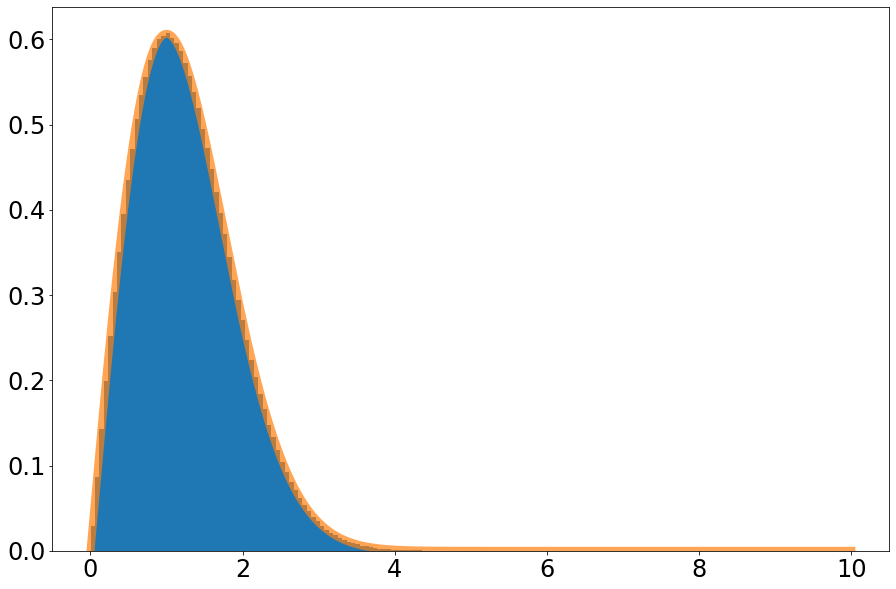

In [142]:
# Section 2.B

d = stats.rayleigh.rvs(size = 10000000)

fig1, ax1 = plt.subplots(1, 1)
ax1.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
x = np.linspace(0,10,10000)
ax1.plot(x,stats.rayleigh.pdf(x),linewidth = 8,alpha = 0.7)
plt.show()

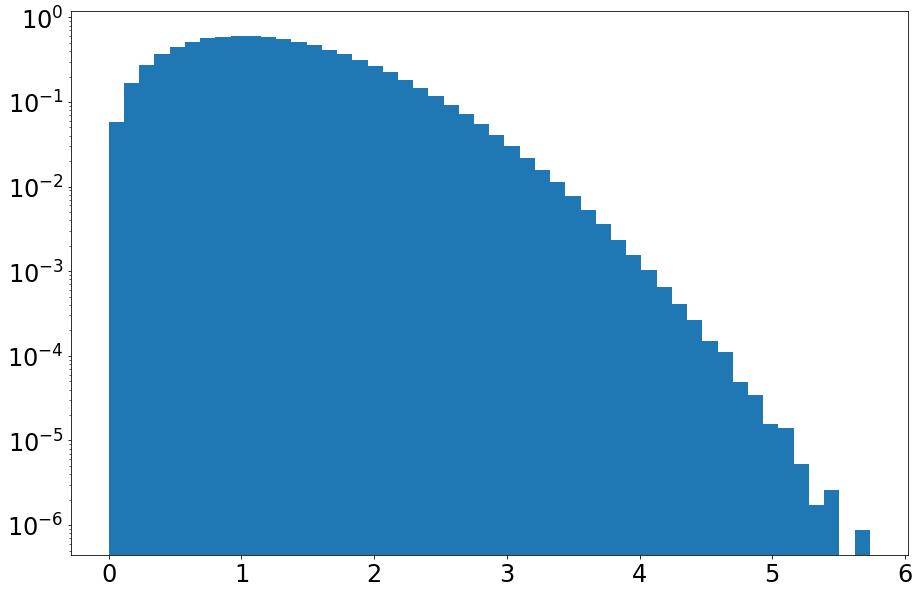

In [141]:
ax = plt.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.show()

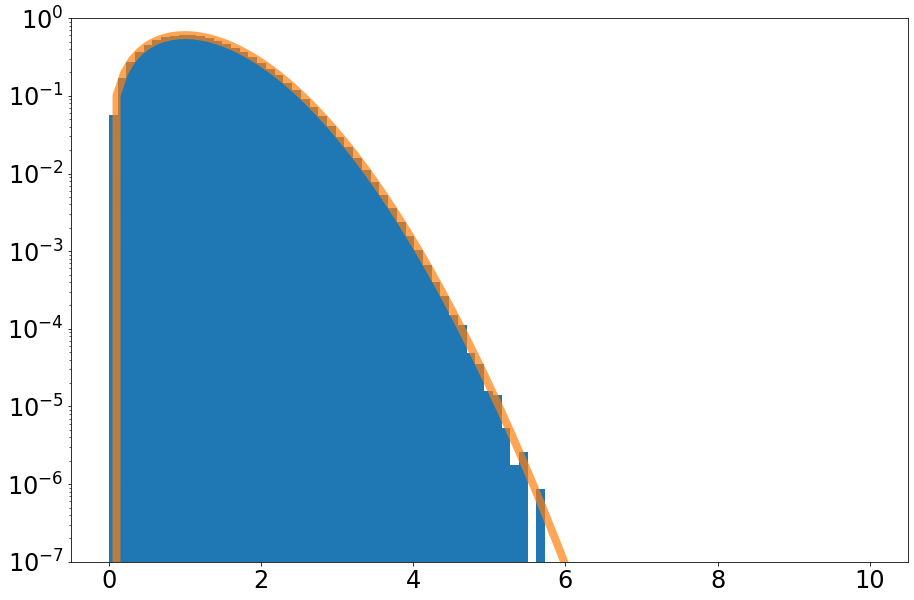

In [139]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
x = np.linspace(0,10,100)
plt.ylim(0.0000001, 1)
ax.plot(x,stats.rayleigh.pdf(x),linewidth = 8,alpha = 0.7)
plt.show()

Section 2.B

The first plot shows the data plotted with a Rayleigh distribution, and it seems to follow the distribution exactly.

The second plot is the semilog of the data in order to better see how the rare events follow the Rayleigh distribution.

The third plot also plots the semilog of the Rayleigh distribution on top of the histogram, this serves to show that the data doesn't perfectly follow the distribution at the rare events.

Section 3.A

Hypothetical measurement is 4.5, I have chosen this value as it would be a rare event.

Section 3.B

What is the probability if there was no signal, that we could get a measurement that is more signal like than 0.0015.

Section 3.C

$\int_{0.0015}^\infty\frac{x}{\sigma^2}\mathrm{e}^{\frac{\mathrm{-x^2}}{2\sigma^2}},\mathrm{d}x$

This is integrating the equation for the probability density function of a Rayleigh distribution from the measurement, to infinity. This integral will then get the probability of a measurement being greater than that value if there wasn't a signal.

In [51]:
# Section 3.D

prob_less = stats.rayleigh.cdf(4.5)
prob_greater = 1 - prob_less

print("prob_greater ", prob_greater)

# Section 3.E

sigma = abs(stats.norm.ppf(prob_greater))

print("Sigma ", sigma)

prob_greater  4.006529739297715e-05
Sigma  3.9440091612702726


Because the ppf integrates from negative infinity, the outputted sigma is negative. Because a gaussian distribution is symmetrical, I take the absolute value to get the proper sigma value.

If we take the value of 5$\sigma$ to be enough to rule out the possibility of noise, this value is not rare enough to be sure that it was not caused by noise in the data.

In [57]:
# Section 4

prob_less1 = stats.rayleigh.cdf(0.5)
prob_less2 = stats.rayleigh.cdf(1)
prob_less3 = stats.rayleigh.cdf(2)
prob_less4 = stats.rayleigh.cdf(3)
prob_less5 = stats.rayleigh.cdf(4)

prob_greater1 = 1 - prob_less1
prob_greater2 = 1 - prob_less2
prob_greater3 = 1 - prob_less3
prob_greater4 = 1 - prob_less4
prob_greater5 = 1 - prob_less5

print("prob_less1 ", prob_less1)
print("prob_less2 ", prob_less2)
print("prob_less3 ", prob_less3)
print("prob_less4 ", prob_less4)
print("prob_less5 ", prob_less5)
print()
print("prob_greater1 ", prob_greater1)
print("prob_greater2 ", prob_greater2)
print("prob_greater3 ", prob_greater3)
print("prob_greater4 ", prob_greater4)
print("prob_greater5 ", prob_greater5)

sigma_less1 = stats.norm.ppf(prob_less1)
sigma_less2 = stats.norm.ppf(prob_less2)
sigma_less3 = stats.norm.ppf(prob_less3)
sigma_less4 = stats.norm.ppf(prob_less4)
sigma_less5 = stats.norm.ppf(prob_less5)

sigma_greater1 = stats.norm.ppf(prob_greater1)
sigma_greater2 = stats.norm.ppf(prob_greater2)
sigma_greater3 = stats.norm.ppf(prob_greater3)
sigma_greater4 = stats.norm.ppf(prob_greater4)
sigma_greater5 = stats.norm.ppf(prob_greater5)

print()
print("sigma_less1 ", sigma_less1)
print("sigma_less2 ", sigma_less2)
print("sigma_less3 ", sigma_less3)
print("sigma_less4 ", sigma_less4)
print("sigma_less5 ", sigma_less5)
print()
print("sigma_greater1 ", sigma_greater1)
print("sigma_greater2 ", sigma_greater2)
print("sigma_greater3 ", sigma_greater3)
print("sigma_greater4 ", sigma_greater4)
print("sigma_greater5 ", sigma_greater5)

prob_less1  0.1175030974154046
prob_less2  0.3934693402873666
prob_less3  0.8646647167633873
prob_less4  0.9888910034617577
prob_less5  0.9996645373720975

prob_greater1  0.8824969025845955
prob_greater2  0.6065306597126334
prob_greater3  0.1353352832366127
prob_greater4  0.011108996538242266
prob_greater5  0.00033546262790251635

sigma_less1  -1.1875615473802972
sigma_less2  -0.27028802073873587
sigma_less3  1.1015196284987503
sigma_less4  2.286620338178611
sigma_less5  3.4011926561446617

sigma_greater1  1.1875615473802972
sigma_greater2  0.27028802073873587
sigma_greater3  -1.10151962849875
sigma_greater4  -2.286620338178611
sigma_greater5  -3.4011926561446617


Section 4

As the measured the increases the probability of a value being less than it decreases, while the probability of being greater than it decreases.

The magnitude of sigma increases as the probability decreases. This makes sense as there is less area under the curve of the gaussian distribution, the further out from the mean that you are.

The values of sigma for the probabilities of being less than or greater than for a given value are equal in magnitude, but opposite in sign, this makes sense as the corresponding probabilities would be located at sigmas on opposite sides of the gaussian distribution.

Non Continuous Distributions A

The Binomial distribution is a discrete probability density function that predicts the probability of n successes from running N trials.

The Poisson distribution is another discrete probability distribution function that predicts the probability of n events happening during a certain time period given the average number of events that happen during the time period.

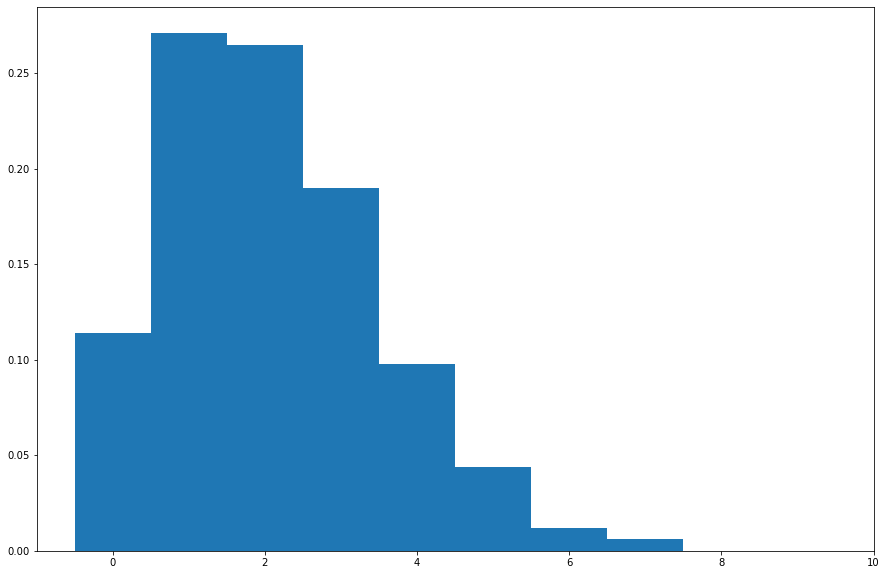

In [206]:
# Non Continuous Distributions B

d = np.random.poisson(2, 100000)

bins = np.arange(11) - 0.5
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True)
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.show()

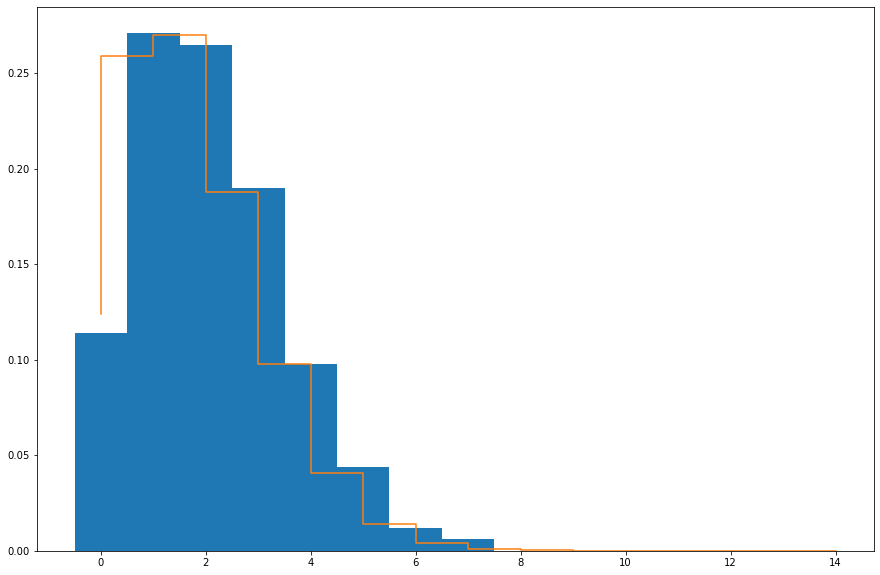

In [207]:
def fit_function(k, lamb):
    return poisson.pmf(k, lamb)

parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)
x = np.arange(0, 15)
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True)
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.step(
    x,
    fit_function(x, *parameters),
)
plt.show()

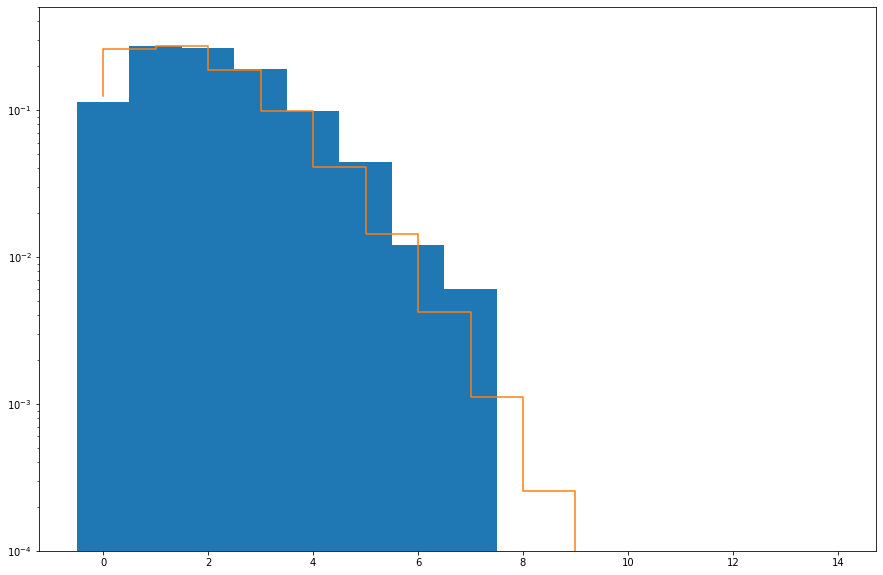

In [208]:
def fit_function(k, lamb):
    return poisson.pmf(k, lamb)

parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)
x = np.arange(0, 15)
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True)
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.step(
    x,
    fit_function(x_plot, *parameters),
)
plt.yscale('log')
plt.ylim(0.0001,0.5)
plt.show()

Section C

Given that the decay of an atom in a radioactive element decays on average twice in a month, what is the probability that it decays 6 times in a month?

In [211]:
probability = poisson.pmf(6, 2)
print(probability)

0.012029802954365565


Section D

Probabilities being discrete would likely increase the effect that random noise has on the data, as it would liekly be harder to detect noise as there would be extra counts added at these specific probabilities/

Section E

It makes sense that the averages of discrete distributions can be continuos, as the averge of a series of integers can  also be continuous. For example the average of 1 and 4 is 2.5. The average is based on a sum of all of the counts so it can be continuous, whereas the probabilities themselves must be tied to specific events, which there are a discrete number of.